# MAT281 - Laboratorio N°06



## Problema 01
<img src="./images/logo_iris.jpg" width="360" height="360" align="center"/>

El **Iris dataset** es un conjunto de datos que contine una  muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [1]:
# librerias
 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes


# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","iris_contaminados.csv"))
df.columns = ['sepalLength',
                  'sepalWidth',
                  'petalLength',
                  'petalWidth',
                  'species']

df.head() 

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,VIRGINICA
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica


In [7]:
df


,sepalLength,sepalWidth,petalLength,petalWidth,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,virginica
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica
...,...,...,...,...,...
145,5.3,3.0,1.1,0.1,setosa
146,4.8,3.0,1.4,0.1,setosa
147,4.9,3.1,1.5,0.1,setosa
148,4.9,3.6,1.4,0.1,setosa


### Bases del experimento

Lo primero es identificar las variables que influyen en el estudio y la naturaleza de esta.

* **species**: 
    * Descripción: Nombre de la especie de Iris. 
    * Tipo de dato: *string*
    * Limitantes: solo existen tres tipos (setosa, virginia y versicolor).
* **sepalLength**: 
    * Descripción: largo del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 4.0 y 7.0 cm.
* **sepalWidth**: 
    * Descripción: ancho del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 2.0 y 4.5 cm.
* **petalLength**: 
    * Descripción: largo del pétalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 1.0 y 7.0 cm.
* **petalWidth**: 
    * Descripción: ancho del pépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 0.1 y 2.5 cm.

Su objetivo es realizar un correcto **E.D.A.**, para esto debe seguir las siguientes intrucciones:

1. Realizar un conteo de elementos de la columna **species** y corregir según su criterio. Reemplace por "default" los valores nan..

In [3]:
print("El numero de elementos de la columna species sin corregir es:", len(df['species'].unique()))
#numero de species sin corregir

El numero de elementos de la columna species sin corregir es: 11


In [31]:
#correccion

df.loc[df["species"]=='Versicolor','species']='versicolor' #se quita la mayuscula inicial
df.loc[df["species"].isnull(),'species']='default' #se reemplazan los null por 'default'
df.loc[df["species"]=='VERSICOLOR', 'species']='versicolor' #se quita la mayuscula de toda la palabra
df.loc[df["species"]=='SETOSA','species']='setosa' #se quita la mayuscula de toda la palabra
df.loc[df["species"]=='VIRGINICA','species']='virginica' #se quita la mayuscula de toda la palabra, aunque en las bases diga que las species sean virginia setosa y versicolor, en todo el resto de instrucciones se nombra virginica 

df['species']=df['species'].str.lower().str.strip()
df['species'].unique()

array(['setosa', 'virginica', 'versicolor', 'default'], dtype=object)

In [32]:
df

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,virginica
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica
...,...,...,...,...,...
145,5.3,3.0,1.1,0.1,setosa
146,4.8,3.0,1.4,0.1,setosa
147,4.9,3.1,1.5,0.1,setosa
148,4.9,3.6,1.4,0.1,setosa


In [14]:
#numero de species corregidas
print("El numero de elementos de la columna species correida es :", len(df['species'].unique()))

El numero de elementos de la columna species correida es : 4


In [33]:
df['species'].unique()

array(['setosa', 'virginica', 'versicolor', 'default'], dtype=object)

2. Realizar un gráfico de box-plot sobre el largo y ancho de los petalos y sépalos. Reemplace por **0** los valores nan.

<AxesSubplot:>

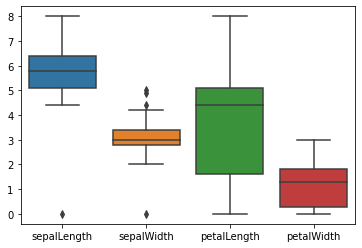

In [16]:
import seaborn as sns

df['sepalLength'].unique()
#reemplazar
df.loc[df['sepalLength'].isnull(),'sepalLength']=0
df.loc[df['sepalWidth'].isnull(),'sepalWidth']=0
df.loc[df['petalLength'].isnull(),'petalLength']=0
df.loc[df['petalWidth'].isnull(),'petalWidth']=0

sns.boxplot(data=df.drop(['species'], axis=1))

3. Anteriormente se define un rango de valores válidos para los valores del largo y ancho de los petalos y sépalos. Agregue una columna denominada **label**  que identifique cuál de estos valores esta fuera del rango de valores válidos.

In [37]:
#filtrar magnitudes

mask_SL_inf =  df['sepalLength']>=4
mask_SL_sup =  df['sepalLength']<=7
mask_SW_inf =  df['sepalWidth']>=2
mask_SW_sup =  df['sepalWidth']<=4.5
mask_PL_inf =  df['petalLength']>=1
mask_PL_sup =  df['petalLength']<=7
mask_PW_inf =  df['petalWidth']>=0.1
mask_PW_sup =  df['petalWidth']<=2.5

mask_SL = mask_SL_inf & mask_SL_sup
mask_SW = mask_SW_inf & mask_SW_sup
mask_PL = mask_PL_inf & mask_PL_sup
mask_PW = mask_PW_inf & mask_PW_sup

#agregar a columna label
df["label"]= mask_SL & mask_SW & mask_PL & mask_PW
df

,sepalLength,sepalWidth,petalLength,petalWidth,species,label
0,4.4,3.2,1.3,3.0,setosa,False
1,7.2,3.6,6.1,2.5,virginica,False
2,6.3,3.3,6.0,2.5,virginica,True
3,6.7,3.3,5.7,2.5,virginica,True
4,6.3,3.4,5.6,2.4,virginica,True
...,...,...,...,...,...,...
145,5.3,3.0,1.1,0.1,setosa,True
146,4.8,3.0,1.4,0.1,setosa,True
147,4.9,3.1,1.5,0.1,setosa,True
148,4.9,3.6,1.4,0.1,setosa,True


4. Realice un gráfico de *sepalLength* vs *petalLength* y otro de *sepalWidth* vs *petalWidth* categorizados por la etiqueta **label**. Concluya sus resultados.

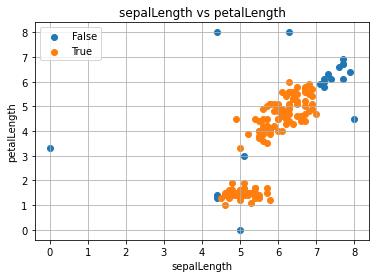

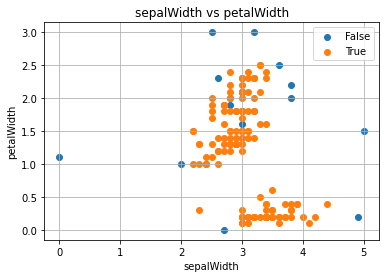

In [40]:
#grafico sepalLength vs petalLength
fig, ax = plt.subplots()
for label in df['label'].unique():
    x = df.loc[df['label']==label, 'sepalLength']
    y = df.loc[df['label']==label, 'petalLength']
    ax.scatter(x, y, label=label)
    
ax.legend()
ax.grid(True)

plt.xlabel('sepalLength')
plt.ylabel('petalLength')
plt.title('sepalLength vs petalLength')
plt.show()

#grafico sepalWidth vs petalWidth
fig, ax = plt.subplots()
for label in df['label'].unique():
    x = df.loc[df['label']==label, 'sepalWidth']
    y = df.loc[df['label']==label, 'petalWidth']
    ax.scatter(x, y, label=label)
    
ax.legend()
ax.grid(True)

plt.xlabel('sepalWidth')
plt.ylabel('petalWidth')
plt.title('sepalWidth vs petalWidth')
plt.show()

Podemos concluir que como se esperaba los datos de False estan mas dispersos ya que estan fuera de un intervalo dado para cada caso, en el caso de Length podemos ver que la mayoria de los False se concentran en los mayores a 7 dado que ambos intervalos estan acotados por 7 por arriba, en el caso de Width estan mas dispersos ya que las cotas tanto por arriba como abajo son distintas, una de 2 a 4.5 y otra de 0.2 a 2.5

Notemos que hay datos que quedan dentro de los intervalos pero estan como falsos en ambos graficos, esto es porque en Width(Length) para el caso de Length(Width) si son falsos entonces los tomas como falsos en general 

5. Filtre los datos válidos y realice un gráfico de *sepalLength* vs *petalLength* categorizados por la etiqueta **species**.

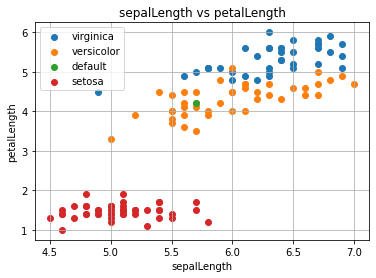

In [43]:
df_fil = df.loc[df['label']==True]

fg, ax = plt.subplots()
for specie in df_fil['species'].unique():
    x_axis = df_fil.loc[df_fil['species']==specie, 'sepalLength']
    y_axis = df_fil.loc[df_fil['species']==specie, 'petalLength']
    ax.scatter(x_axis,y_axis,label=specie)
    
ax.legend()
ax.grid(True)

plt.xlabel('sepalLength')
plt.ylabel('petalLength')
plt.title('sepalLength vs petalLength')
plt.show()